In [622]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import gammaln
from scipy.stats import norm
from scipy.optimize import minimize
from scipy.stats.kde import gaussian_kde

# MLE

For exercise #2, we will fit a gamma and a lognormal distribution to the hapiness score using MLE.

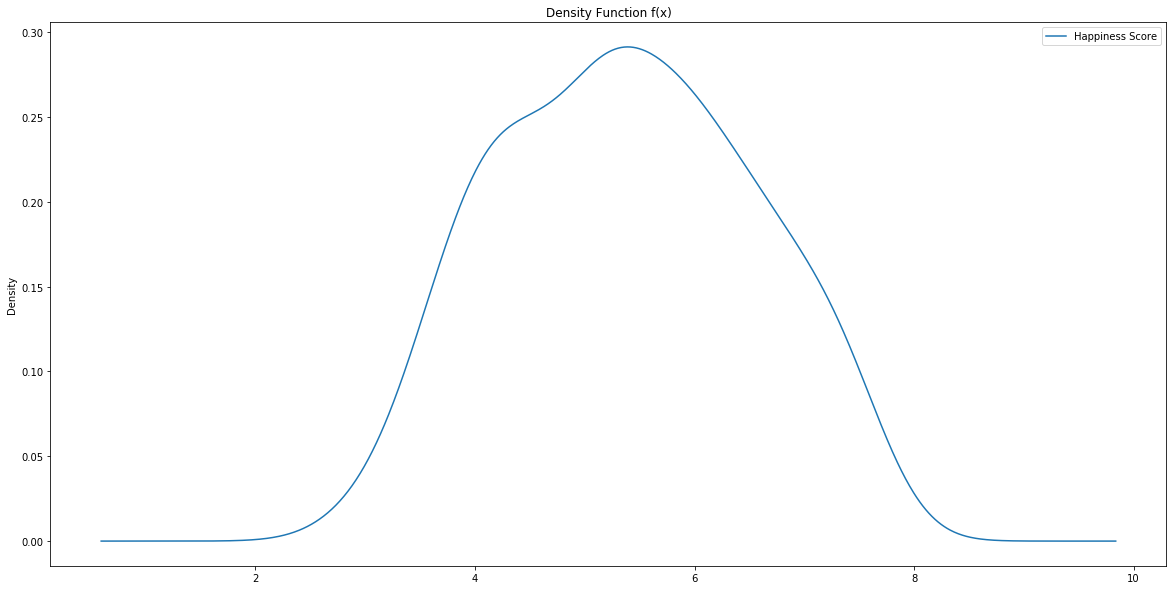

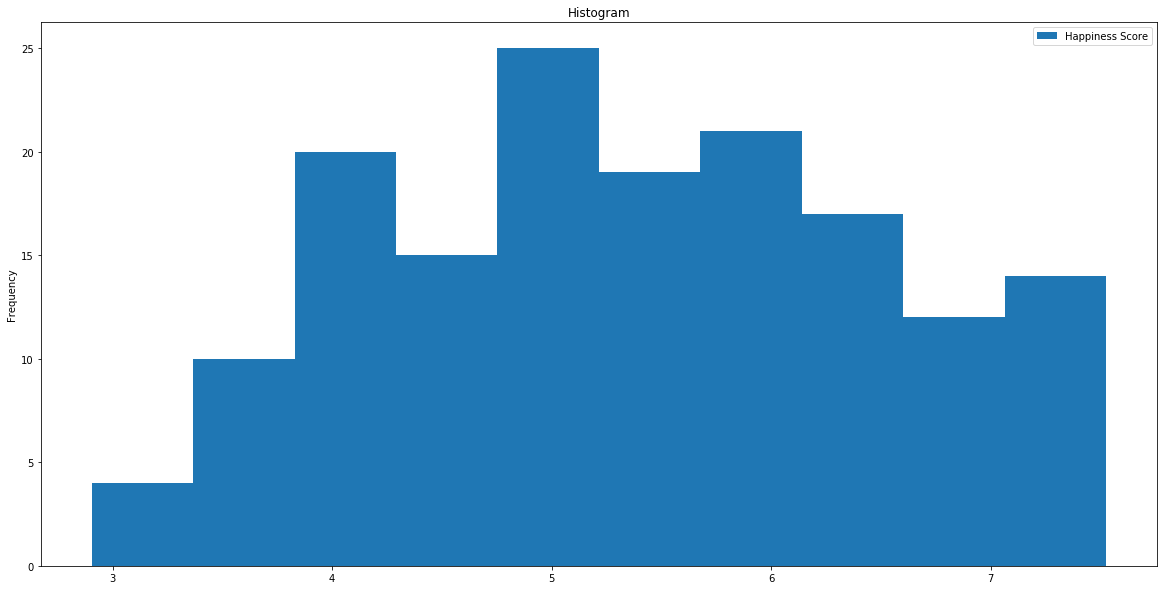

In [623]:
happiness_data = pd.read_csv('Happiness.csv')
happiness_score = happiness_data[['Happiness Score']]
happiness_score.plot(kind = 'density', figsize = (20,10), title='Density Function f(x)')
happiness_score.plot(kind= 'hist', figsize=(20,10), bins=10, title='Histogram')

# Shifted Gamma Distribution

Given the pdf of the Gamma Distribution

$$\Large f_\mu(x) = \frac{ (x-\lambda)^{v-1} }{ \sigma^v\Gamma(v) } e^{ -\frac{ x-\lambda }{ \sigma } }$$

For simplicity, we leave the whole formula in terms of the exponential of $e$

$$\Large f_\mu(x) = e^{ -\frac{ x-\lambda }{ \sigma }+ \ln \left[ \frac{ (x-\lambda)^{v-1} }{ \sigma^v\Gamma(v) } \right] }$$
$$\Large = e^{ -\frac{ x-\lambda }{ \sigma } + \ln \left( (x-\lambda)^{v-1} \right) - \ln \left( \sigma^v\Gamma(v) \right) }$$
$$\Large = e^{ -\frac{ x-\lambda }{ \sigma } + (v-1) \ln(x-\lambda) - \ln \left( \sigma^v \right) - \ln \left( \Gamma(v) \right) }$$
$$\Large = e^{ -\frac{ x-\lambda }{ \sigma } + (v-1) \ln(x-\lambda) - v\ln \left( \sigma \right) - \ln \left( \Gamma(v) \right) }$$



In [624]:
def gamma_pdf(x, lamb, sigma, v):

    return np.exp( -(x-lamb)/sigma + (v-1)*np.log(x-lamb) - v*np.log(sigma) - gammaln(v) )

Using the formula to obtain the likelihood function:

$$\Large l_x(\mu) = \sum_{i=1}^{n} \ln f_\mu(x_i) = \sum_{i=1}^{n} l_{x_i}(\mu)$$

We obtain the following expression,

$$ \Large \sum_{i=1}^{n} \ln f_\mu(x_i) = \sum_{i=1}^{n} \left[ -\frac{ x_i-\lambda }{ \sigma } + (v-1) \ln(x_i-\lambda) - v\ln \left( \sigma \right) - \ln \left( \Gamma(v) \right) \right] $$




As we're using a minimization function, we minimize the negative of the log likelihood function.

In [625]:
def neg_gamma_log_likelihood(x, lamb, sigma, v):
    
    return - np.sum( -(x-lamb)/sigma + (v-1)*np.log(x-lamb) - v*np.log(sigma) - gammaln(v) ) 

In [626]:
neg_gamma_log_lik_for_x = lambda theta: neg_gamma_log_likelihood(happiness_score, theta[0], theta[1], theta[2])

gamma_min = minimize(neg_gamma_log_lik_for_x, (2, 1, 2), method='L-BFGS-B', bounds=[(0, None), (0, None), (0, None)])
gamma_min

      fun: Happiness Score    244.213979
dtype: float64
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.54191264,  0.19470292, -2.33287381])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 404
      nit: 16
   status: 2
  success: False
        x: array([2.90500234, 0.71194444, 3.50265306])

# Gamma Distribution Optimal Values of $\hat{\lambda}$, $\hat{\sigma}$, $\hat{v}$

In [627]:
theta_gamma = gamma_min['x']
theta_gamma

array([2.90500234, 0.71194444, 3.50265306])

# Lognormal Distribution

Given the pdf of the Lognormal Distribution

$$\Large f_\mu(x) = \frac{1}{x\sigma\sqrt{2\pi}} e^{ -\frac{ (\ln x - \mu)^2 }{ 2\sigma^2 } }$$

For simplicity, we leave the whole formula in terms of the exponential of $e$

$$\Large f_\mu(x) =  e^{ -\frac{ (\ln x - \mu)^2 }{ 2\sigma^2 } + \ln \left[ \frac{1}{x\sigma\sqrt{2\pi}} \right] }$$
$$\Large = e^{ -\frac{ (\ln x - \mu)^2 }{ 2\sigma^2 } - \ln \left( x\sigma\sqrt{2\pi} \right) }$$
$$\Large = e^{ -\frac{ (\ln x - \mu)^2 }{ 2\sigma^2 } - \ln(x) - \ln(\sigma) - \frac{1}{2}\ln(2\pi) }$$



In [628]:
def lognormal_pdf(x, mu, sigma):

    return np.exp( -((np.log(x)-mu)**2)/(2*sigma**2) - np.log(x) - np.log(sigma) - 0.5*np.log(2*math.pi) )

Using the formula to obtain the likelihood function:

$$\Large l_x(\mu) = \sum_{i=1}^{n} \ln f_\mu(x_i) = \sum_{i=1}^{n} l_{x_i}(\mu)$$

We obtain the following expression,


$$ \Large \sum_{i=1}^{n} \ln f_\mu(x_i) = \sum_{i=1}^{n} \left[ -\frac{ (\ln x - \mu)^2 }{ 2\sigma^2 } - \ln(x) - \ln(\sigma) - \frac{1}{2}\ln(2\pi) \right] $$

As we're using a minimization function, we minimize the negative of the log likelihood function.

In [629]:
def neg_lognormal_log_likelihood(x, mu, sigma):
    
    return - np.sum( -((np.log(x)-mu)**2)/(2*sigma**2) - np.log(x) - np.log(sigma) - 0.5*np.log(2*math.pi) ) 

In [630]:
neg_lognormal_log_lik_for_x = lambda theta: neg_lognormal_log_likelihood(happiness_score, theta[0], theta[1])

lognormal_min = minimize(neg_lognormal_log_lik_for_x, (1.6, 0.2), method='L-BFGS-B', bounds=[(0, None), (0, None)])
lognormal_min

      fun: Happiness Score    244.971467
dtype: float64
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00013358, -0.00239879])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 30
      nit: 7
   status: 0
  success: True
        x: array([1.65974407, 0.21907165])

# Lognormal Distribution Optimal Values of $\hat{\mu}$, $\hat{\sigma}$

In [631]:
theta_lognormal = lognormal_min['x']
theta_lognormal

array([1.65974407, 0.21907165])

# Distribution data

Once the optimal parameters are obtained for both the gamma and the lognormal distribution, a pandas data frame is built to plot the happiness score against the proposed distributions.




In [632]:
min_bound = min(np.array(happiness_score))
max_bound = max(np.array(happiness_score))
samples   = 100
x_data    = np.linspace(min_bound[0], max_bound[0], samples)

pdf_df = pd.DataFrame({'happiness_score'    : x_data,
                       'gamma_density'      : gamma_pdf(x_data, theta_gamma[0], theta_gamma[1], theta_gamma[2]),
                       'lognormal_density'  : lognormal_pdf(x_data, theta_lognormal[0], theta_lognormal[1])})
pdf_df

,happiness_score,gamma_density,lognormal_density
0,2.905000,NaN,0.016012
1,2.951677,0.000431,0.019140
2,2.998354,0.002289,0.022698
3,3.045030,0.005913,0.026713
4,3.091707,0.011377,0.031208
...,...,...,...
95,7.339293,0.080870,0.077882
96,7.385970,0.077749,0.074023
97,7.432646,0.074729,0.070320
98,7.479323,0.071806,0.066769


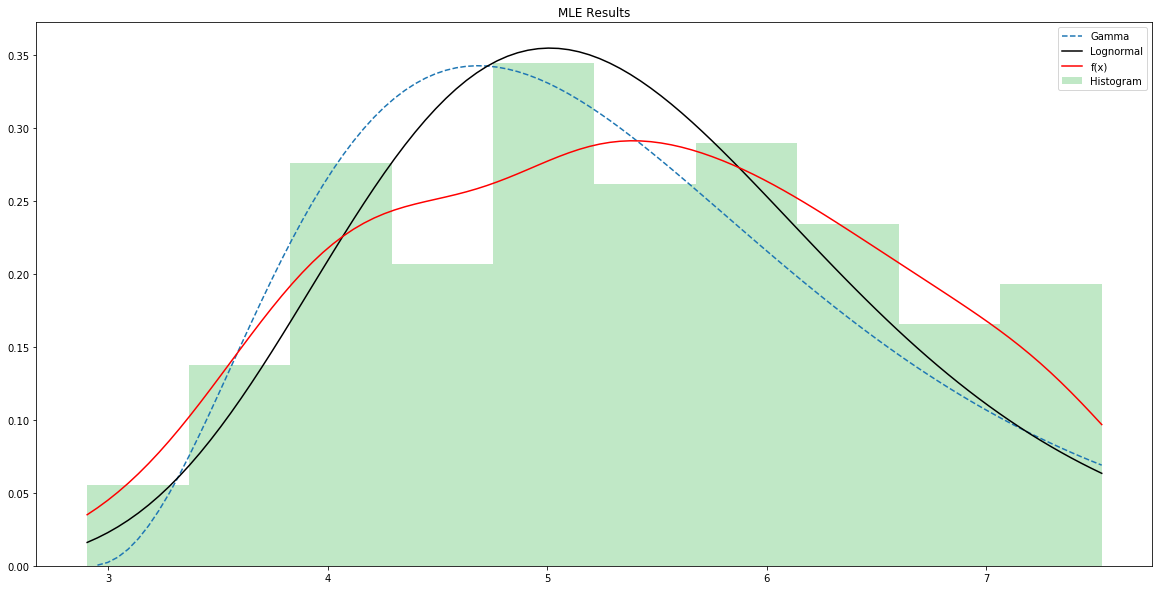

In [633]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
ax.set_title('MLE Results')
ax.plot(pdf_df['happiness_score'], pdf_df['gamma_density'], '--', label='Gamma')
ax.plot(pdf_df['happiness_score'], pdf_df['lognormal_density'], '-k', label='Lognormal')

happiness_score_values = []
for score in happiness_score.values:
    happiness_score_values.append(score[0])

kde = gaussian_kde(happiness_score_values)
ax.plot(x_data, kde(x_data), '-r', label='f(x)')

myHist = plt.hist(happiness_score_values, 10, normed=True, label='Histogram', color=(0.752, 0.909, 0.776) )

#myHist = plt.hist(happiness_score, 27, normed=True)
ax.legend()

# MLE results

In the graph above, both the gamma and lognormal distributions represent good aproximations of the hapiness score's distribution, being the gamma distribution slightly skewed to the left. In terms of standard error, the **lognormal distribution** is a better fit, but none is really a good enough fit.

## Std error formula

$$\Large \hat{\sigma} = \sqrt{ \frac{1}{N-1} \sum_{i=1}^{n} (y_i-\hat{y_i})^2}$$

## Gamma Std Error

In [634]:
def gamma_std_error(x,y):

    x_m = []
    for i in range(1,len(x)):
        x_m.append((x[i]+x[i-1])/2)
    x_m = np.array(x_m)
    
    std_err = np.sqrt( 1/(len(y)-1) * np.nansum( ( y - gamma_pdf(x_m,theta_gamma[0],theta_gamma[1],theta_gamma[2]) )**2 ) ) 
    return std_err

gamma_std_error(np.array(myHist[1]),np.array(myHist[0]))


0.06787861708068886

# Lognormal Std Error

In [635]:
def lognormal_std_error(x,y):

    x_m = []
    for i in range(1,len(x)):
        x_m.append((x[i]+x[i-1])/2)
    x_m = np.array(x_m)
    
    std_err = np.sqrt( 1/(len(y)-1) * np.nansum( ( y - lognormal_pdf(x_m,theta_lognormal[0],theta_lognormal[1]) )**2 ) ) 
    return std_err

lognormal_std_error(np.array(myHist[1]),np.array(myHist[0]))

0.06363573846122975